# Alex ML Testing

In [7]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [8]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5858779240584718843
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1860829184
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8858134801209231948
physical_device_desc: "device: 0, name: NVIDIA RTX 500 Ada Generation Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


I0000 00:00:1733062021.611312 1525168 gpu_device.cc:2022] Created device /device:GPU:0 with 1774 MB memory:  -> device: 0, name: NVIDIA RTX 500 Ada Generation Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [9]:
# Example: Generating random data for demonstration
num_samples = 1000
X = np.random.rand(num_samples, 49)  # 49 input features
y = np.random.rand(num_samples, 3)    # 3 output features (x, y, z)

In [31]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (1000, 49)
y shape: (1000, 3)


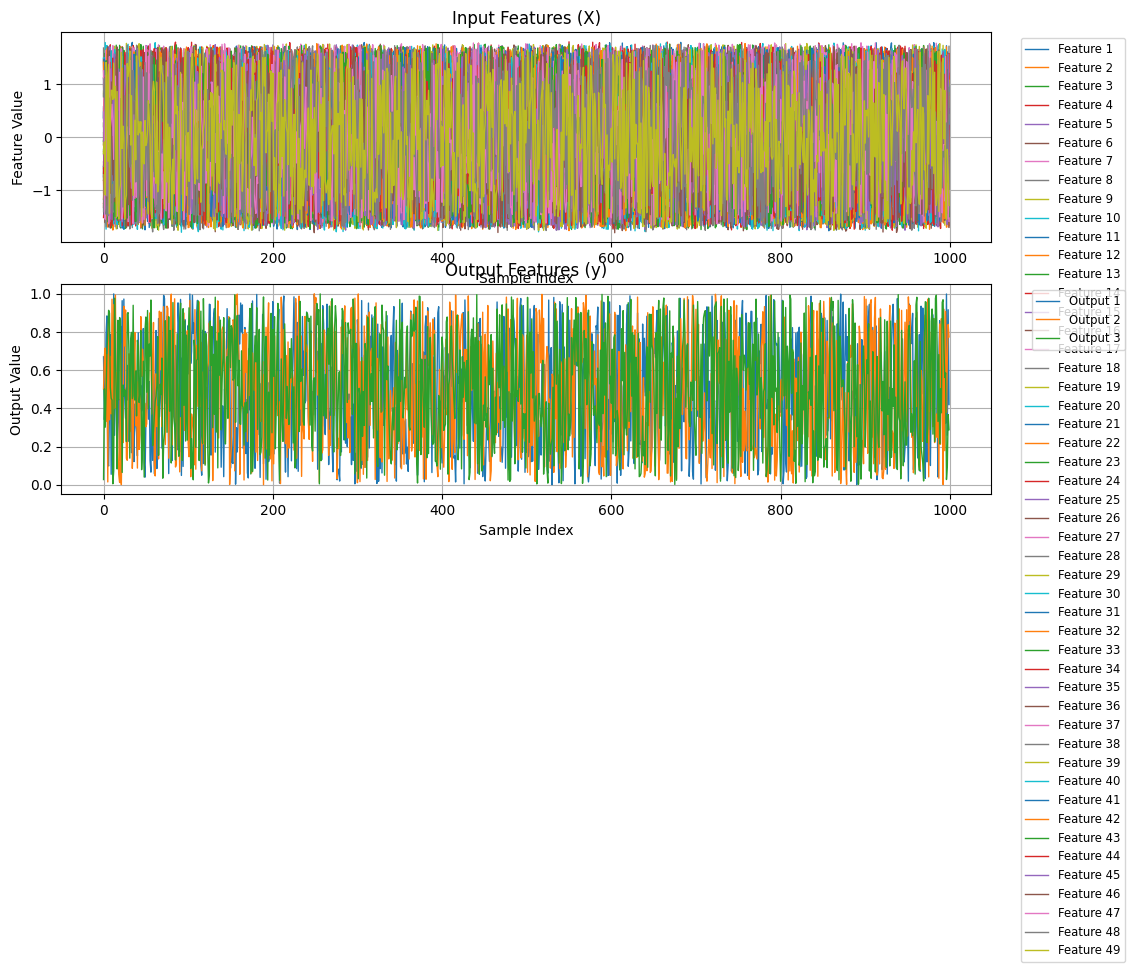

In [26]:
# Create a figure
plt.figure(figsize=(12, 6))

# Plotting the input features (X)
plt.subplot(2, 1, 1)
for i in range(X.shape[1]):  # Loop through each feature (column)
    plt.plot(X[:, i], label=f'Feature {i+1}', linewidth=1)
plt.title('Input Features (X)')
plt.xlabel('Sample Index')
plt.ylabel('Feature Value')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fontsize='small')
plt.grid()

# Plotting the output features (y)
plt.subplot(2, 1, 2)
for i in range(y.shape[1]):  # Loop through each output feature (column)
    plt.plot(y[:, i], label=f'Output {i+1}', linewidth=1)
plt.title('Output Features (y)')
plt.xlabel('Sample Index')
plt.ylabel('Output Value')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fontsize='small')
plt.grid()

plt.show()

In [11]:
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, activation='relu', input_shape=(49,)))

# Second hidden layer
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(3, activation='linear'))  # Linear activation for regression

/home/alexbeat/AlexDev/ai-imu-grf/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1733062049.750675 1525168 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1774 MB memory:  -> device: 0, name: NVIDIA RTX 500 Ada Generation Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [12]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [13]:
model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100


I0000 00:00:1733062070.958993 1526600 service.cc:148] XLA service 0x7b3494004a10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733062070.959025 1526600 service.cc:156]   StreamExecutor device (0): NVIDIA RTX 500 Ada Generation Laptop GPU, Compute Capability 8.9
2024-12-01 16:07:50.971232: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733062071.024238 1526600 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - loss: 0.6140 - mae: 0.6177

I0000 00:00:1733062071.658865 1526600 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4538 - mae: 0.5346 - val_loss: 0.2466 - val_mae: 0.4011
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2041 - mae: 0.3676 - val_loss: 0.1849 - val_mae: 0.3481
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1448 - mae: 0.3127 - val_loss: 0.1652 - val_mae: 0.3306
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1181 - mae: 0.2850 - val_loss: 0.1549 - val_mae: 0.3209
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1059 - mae: 0.2668 - val_loss: 0.1485 - val_mae: 0.3145
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0936 - mae: 0.2532 - val_loss: 0.1459 - val_mae: 0.3117
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0884 - mae: 0.2444 - val_loss: 0.1428 - val_mae: 0.3091
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0775 - mae: 0.2298 - val_loss: 0.1410 - val_mae: 0.3068
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0757 - mae: 0.

In [14]:
# Example: Generating random test data
X_test = np.random.rand(200, 49)
y_test = np.random.rand(200, 3)

# Normalize test data
X_test = scaler.transform(X_test)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1925 - mae: 0.3550 
Test Loss: 0.19950096309185028, Test MAE: 0.35779517889022827


In [17]:
predictions = model.predict(X_test)
print(predictions)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[ 0.16554755  0.27891505  0.15873335]
 [ 0.8673127   0.4705618   0.01931573]
 [ 0.7269565   0.5762537   0.22533579]
 [ 0.21449888  0.6862068   0.28023368]
 [ 0.561641    0.3959028   0.4995305 ]
 [ 0.4522377   0.23671746  0.670199  ]
 [ 0.26444215  0.46862727  0.48718476]
 [ 0.48610622  0.33841148  0.6349262 ]
 [ 0.4862531   0.00995941 -0.03870511]
 [ 0.00944845  0.19379288  0.693926  ]
 [ 0.13644737  0.7591868   0.46888793]
 [ 0.524321    0.78552395  0.68674785]
 [ 0.77674365  0.48413348  0.92086947]
 [ 0.3827479   0.51056165  1.0846013 ]
 [ 0.66273254  0.46921787  0.42833745]
 [ 0.22290897  0.3179611   0.3057472 ]
 [ 0.12949637  0.5779985   0.62378436]
 [ 0.453209    0.51081306  0.00471849]
 [ 0.59769404  1.2181745   0.80771035]
 [ 0.8376838   0.44098812  1.1641483 ]
 [ 0.54901236  0.1553058   0.7783578 ]
 [ 0.23049101 -0.01969207  0.01941104]
 [ 0.47566056  0.63734704  0.558925  ]
 [ 0.73478353  0.9122561   0.59273744]
 [ 0.49518564  0.1735809  

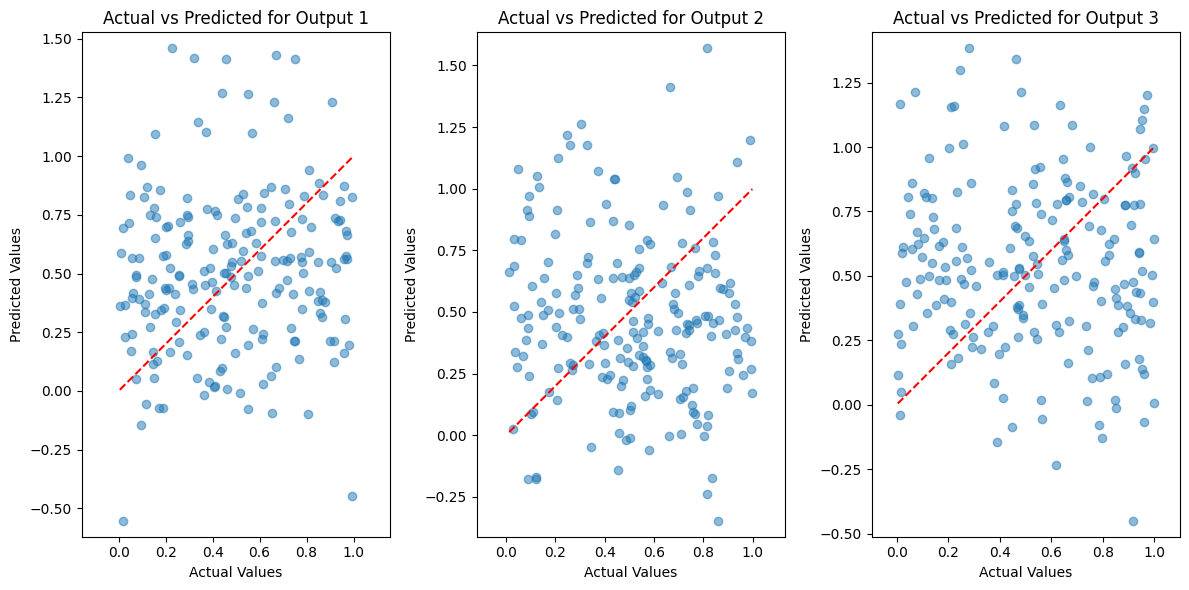

In [19]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(12, 6))
actual_values = y_test
predicted_values = predictions

# Plot actual vs predicted for each output (x, y, z)
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(actual_values[:, i], predicted_values[:, i], alpha=0.5)
    plt.plot([actual_values[:, i].min(), actual_values[:, i].max()],
             [actual_values[:, i].min(), actual_values[:, i].max()], 'r--')  # Diagonal line
    plt.title(f'Actual vs Predicted for Output {i+1}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.axis('equal')

plt.tight_layout()
plt.show()